## Random Forest

Random Forest is an ensemble of Decision Trees. With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following `BaggingClassifier` is roughly equivalent to the previous `RandomForestClassifier`:

## Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project was continuing to spread throughout the world. Many governments recommended only essential outings to public places and closed most business that do not serve food or sell essential items. An excellent [spatial dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) built by Johns Hopkins shows the daily confirmed cases by country. 

This case study was designed to drive home the important role that data science plays in real-world situations like this pandemic. This case study uses the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on [Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset) to encourage research on this important topic. The goal of the case study is to build a Random Forest Classifier to predict the 'state' of the patient.

First, please load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [178]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#!pip install scikit-learn --user --upgrade pip
#!pip install plotly
%matplotlib inline

import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [179]:
url ='/resources/springboard/Random Forest Case Study/PatientInfo.csv'
df = pd.read_csv(url)
df.head(2)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released


In [180]:
df.shape

(2218, 18)

In [181]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [182]:
#counts of response variable values
df.state.value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

 **<font color='teal'> Create a new column named 'n_age' which is the calculated age based on the birth year column.</font>**

In [183]:
# missing 'birth_year' can be related to 'age' when there is NULL in birth_year. other than we can drop rows with the presense of both NULL
df = df.dropna(axis=0, subset=['age'])

In [184]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,1938
1,deceased_date,1925
2,infection_order,1915
3,symptom_onset_date,1774
4,released_date,1736
5,infected_by,1576
6,contact_number,1555
7,infection_case,910
8,global_num,750
9,birth_year,303


In [185]:
# null values of 'age' addressed 

In [186]:
# age estimated...from 'age' column
age_estimated= datetime.now().year-pd.to_numeric(df['age'].astype(str).str[:-1])
age_estimated

0       1970
1       1990
2       1970
3       2000
4       2000
        ... 
2213    1990
2214    2000
2215    2000
2216    1980
2217    1980
Name: age, Length: 1957, dtype: int64

In [187]:
df.birth_year.fillna(age_estimated, inplace=True)

In [188]:
df.birth_year.head(2)

0    1964.0
1    1987.0
Name: birth_year, dtype: float64

In [189]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,1938
1,deceased_date,1925
2,infection_order,1915
3,symptom_onset_date,1774
4,released_date,1736
5,infected_by,1576
6,contact_number,1555
7,infection_case,910
8,global_num,750
9,city,62


In [190]:
# 'birth_year' Null values addressed

In [191]:
# create 'n_age' column
df['n_age']=datetime.now().year-pd.DatetimeIndex(df['birth_year']).year

In [192]:
df.head(2)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,50
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,50


In [193]:
# still 12 missing columns to address

### Handle Missing Values

 **<font color='teal'> Print the number of missing values by column.</font>**

In [194]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,1938
1,deceased_date,1925
2,infection_order,1915
3,symptom_onset_date,1774
4,released_date,1736
5,infected_by,1576
6,contact_number,1555
7,infection_case,910
8,global_num,750
9,city,62


 **<font color='teal'> Fill the 'disease' missing values with 0 and remap the True values to 1.</font>**

In [195]:
df.loc[~df['disease'].isnull(),['disease']]=1
df.disease.fillna(0,inplace=True)

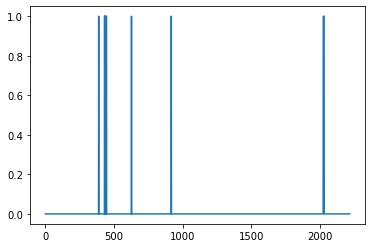

In [196]:
plt.plot(df.disease)

 **<font color='teal'> Fill null values in the following columns with their mean: 'global_number','birth_year','infection_order','infected_by'and 'contact_number'</font>**

In [197]:
df['global_num'].fillna((df['global_num'].mean()), inplace=True)

In [198]:
df['birth_year'].fillna((df['birth_year'].mean()), inplace=True)

In [199]:
df['infection_order'].fillna((df['infection_order'].mean()), inplace=True)

In [200]:
df['infected_by'].fillna((df['infected_by'].mean()), inplace=True)

In [201]:
df['contact_number'].fillna((df['contact_number'].mean()), inplace=True)

In [202]:
df.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,2.760289e+09,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,50
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,2.760289e+09,31.0,NaN,2020-01-30,2020-03-02,NaN,released,50
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,0,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,50


 **<font color='teal'> Fill the rest of the missing values with any method.</font>**

In [203]:
#check missing values again
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,deceased_date,1925
1,symptom_onset_date,1774
2,released_date,1736
3,infection_case,910
4,city,62
5,sex,2
6,confirmed_date,1
7,state,1


In [204]:
# fill null column values with forward fill
df.ffill(axis=0,inplace=True)

 **<font color='teal'> Check for any remaining null values.</font>**

In [205]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,deceased_date,109


Remove date columns from the data.


In [206]:
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'],axis =1)

Review the count of unique values by column.

In [207]:
print(df.nunique())

patient_id         1957
global_num         1198
sex                   2
birth_year           96
age                  11
country               4
province             17
city                127
disease               2
infection_case       16
infection_order       7
infected_by         194
contact_number       73
state                 3
n_age                 1
dtype: int64


Review the percent of unique values by column.

In [208]:
print(df.nunique()/df.shape[0])

patient_id         1.000000
global_num         0.612161
sex                0.001022
birth_year         0.049055
age                0.005621
country            0.002044
province           0.008687
city               0.064895
disease            0.001022
infection_case     0.008176
infection_order    0.003577
infected_by        0.099131
contact_number     0.037302
state              0.001533
n_age              0.000511
dtype: float64


Review the range of values per column.

In [209]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1957.0,3.976853e+09,2.216604e+09,1.000000e+09,1.400000e+09,6.001000e+09,6.001001e+09,7.000000e+09
global_num,1957.0,4.365651e+03,2.185227e+03,1.000000e+00,3.663000e+03,4.365651e+03,5.592000e+03,8.717000e+03
birth_year,1957.0,1.975833e+03,1.953074e+01,1.916000e+03,1.962000e+03,1.976000e+03,1.993000e+03,2.020000e+03
disease,1957.0,9.708738e-03,9.807851e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
infection_order,1957.0,2.285714e+00,1.816920e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,1957.0,2.760289e+09,7.484656e+08,1.000000e+09,2.760289e+09,2.760289e+09,2.760289e+09,6.113000e+09
contact_number,1957.0,2.440547e+01,4.169074e+01,0.000000e+00,2.440547e+01,2.440547e+01,2.440547e+01,1.160000e+03
n_age,1957.0,5.000000e+01,0.000000e+00,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01


### Check for duplicated rows

In [210]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age


Print the categorical columns and their associated levels.

In [211]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,sex,2
1,age,11
2,country,4
3,province,17
4,city,127
5,infection_case,16
6,state,3


In [212]:
dfo

,sex,age,country,province,city,infection_case,state
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,released
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,released
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,released
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,released
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,released
...,...,...,...,...,...,...,...
2213,male,30s,Korea,Gyeongsangnam-do,Changwon-si,contact with patient,isolated
2214,male,20s,Korea,Jeju-do,Jeju-do,etc,isolated
2215,female,20s,Korea,Jeju-do,Jeju-do,etc,released
2216,female,40s,Korea,Jeju-do,etc,etc,released


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 2217
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       1957 non-null   int64  
 1   global_num       1957 non-null   float64
 2   sex              1957 non-null   object 
 3   birth_year       1957 non-null   float64
 4   age              1957 non-null   object 
 5   country          1957 non-null   object 
 6   province         1957 non-null   object 
 7   city             1957 non-null   object 
 8   disease          1957 non-null   int64  
 9   infection_case   1957 non-null   object 
 10  infection_order  1957 non-null   float64
 11  infected_by      1957 non-null   float64
 12  contact_number   1957 non-null   float64
 13  state            1957 non-null   object 
 14  n_age            1957 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 244.6+ KB


**<font color='teal'> Plot the correlation heat map for the features.</font>**

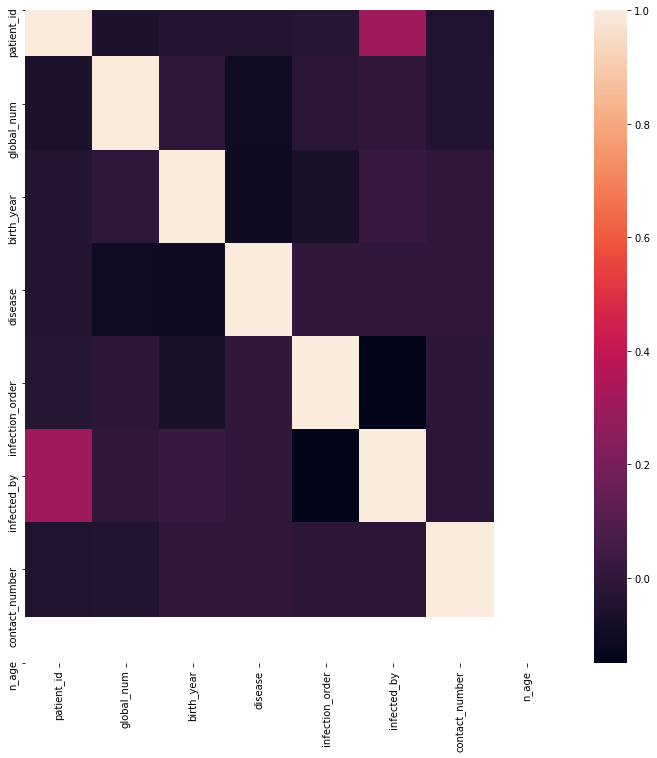

In [214]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,ax=ax)

**<font color='teal'> Plot the boxplots to check for outliers. </font>**

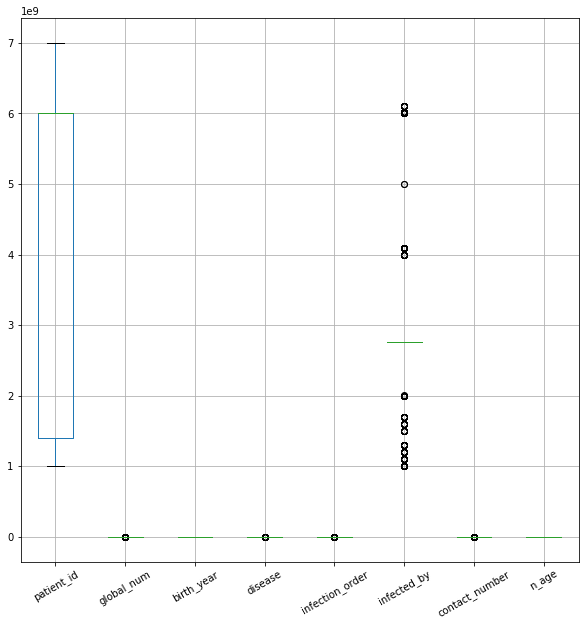

In [215]:
df.boxplot(rot = 30,figsize=(10,10))

**<font color='teal'> Create dummy features for object type features. </font>**

In [216]:
# get 'y' variable and get_dummies
df.state = df.state.astype('category')

df.state = df.state.cat.codes
df.head(2)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,2.760289e+09,75.0,2,50
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,2.760289e+09,31.0,2,50


In [217]:

y=df.state
df.drop(columns='state', inplace=True)
df=pd.get_dummies(df, drop_first=True)

In [218]:
df.head(2)

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex_male,age_100s,...,infection_case_Pilgrimage to Israel,infection_case_River of Grace Community Church,infection_case_Seongdong-gu APT,infection_case_Shincheonji Church,infection_case_Suyeong-gu Kindergarten,infection_case_contact with patient,infection_case_etc,infection_case_gym facility in Cheonan,infection_case_gym facility in Sejong,infection_case_overseas inflow
0,1000000001,2.0,1964.0,0,1.0,2.760289e+09,75.0,50,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1000000002,5.0,1987.0,0,1.0,2.760289e+09,31.0,50,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scale data to prep for model creation

In [219]:
#scale data
from sklearn import preprocessing
import numpy as np
X=df
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 

### Split the data into test and train subsamples

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=1)

In [221]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

### Fit Random Forest Classifier

In [222]:
import time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
#lr_auc = roc_auc_score(y_test, lr_probs)
ac = accuracy_score(y_test, y_pred)
#lo = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
#print('Training Data Set 1 RandomForest: ROC AUC=%.3f' % (lr_auc))
print('Training Data Set 1 Random Forest: Accuracy=%.3f' % (ac))
#print('Training Data Set 1 Random Forest: Log loss=%.3f' % (lo))
print('Training Data Set 1 Random Forest: f1-score=%.3f' % (f1))

Training Data Set 1 Random Forest: Accuracy=0.833
Training Data Set 1 Random Forest: f1-score=0.808


### Create Confusion Matrix Plots

In [223]:
class_names=['isolated','released','deceased'] # name  of classes

Confusion matrix, without normalization
[[  20    4    0]
 [   0 1227   62]
 [   0  195   58]]
Normalized confusion matrix
[[0.83 0.17 0.  ]
 [0.   0.95 0.05]
 [0.   0.77 0.23]]


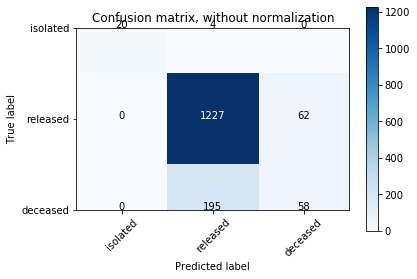

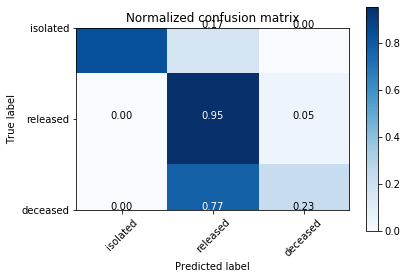

In [224]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

### Plot feature importances

30


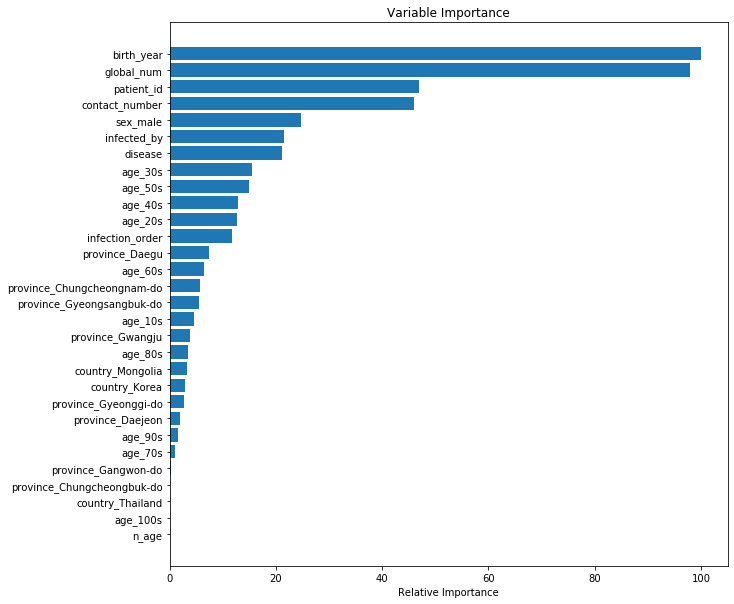

In [225]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The popularity of random forest is primarily due to how well it performs in a multitude of data situations. It tends to handle highly correlated features well, where as a linear regression model does not. In this case study, you saw the performance ability even with only a few features and almost all of them were highly correlated with each other.
Random Forest is also used as an efficient way to investigate the importance of a set of features within a large dataset. Random forest should be your first choice you turn to when building a decision tree, especially when working with multiclass classifications.